# Regression on MCR & MT Data

29 - 01 - 2023 | reg_mcr_mt

Data

In [91]:
import pandas as pd
import numpy as np
df  = pd.read_csv("dataset-mcr-rt-180000.csv")
dataset = df.values
print('Total number of rows:', df.shape[0]) #940520
X = dataset[:, 6] # rt column
print(np.min(X)," ",np.max(X))
Y = dataset[:, 5] # mcr column
print(np.min(Y)," ",np.max(Y))

Total number of rows: 179996
0.01   5858.833333333333
0.0253444780071999   4874.2


Correlation

In [92]:
from scipy.stats import pearsonr

corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.752


Scatter

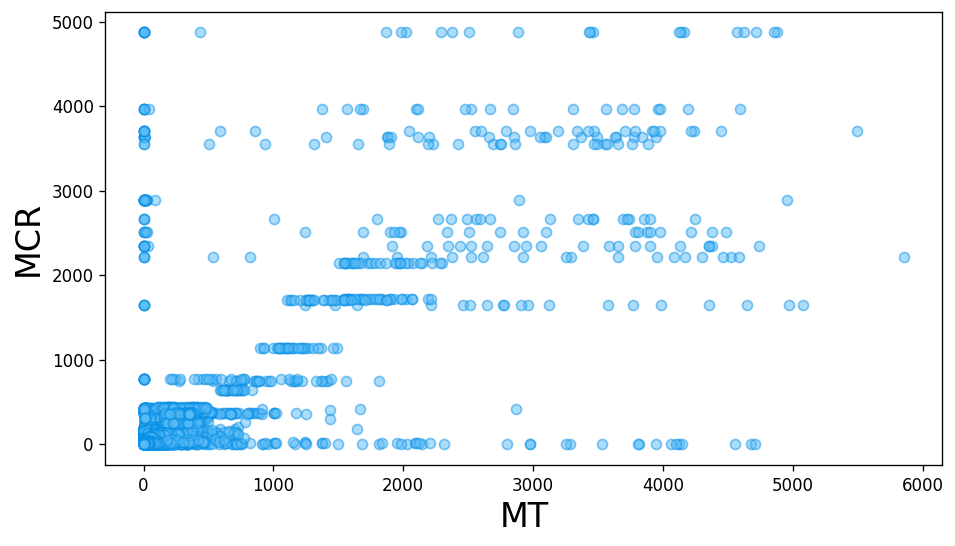

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X, y=Y, color="#59bbf7", marker="o",alpha=0.5, edgecolors="#0991e6")
#plt.title('Data')
plt.ylabel('MCR', fontsize=20)
plt.xlabel('MT', fontsize=20)
plt.show()

Reshape + Split

In [94]:
X = X.reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Linear Regression + Predict + Plot ( Before Preprocessing )

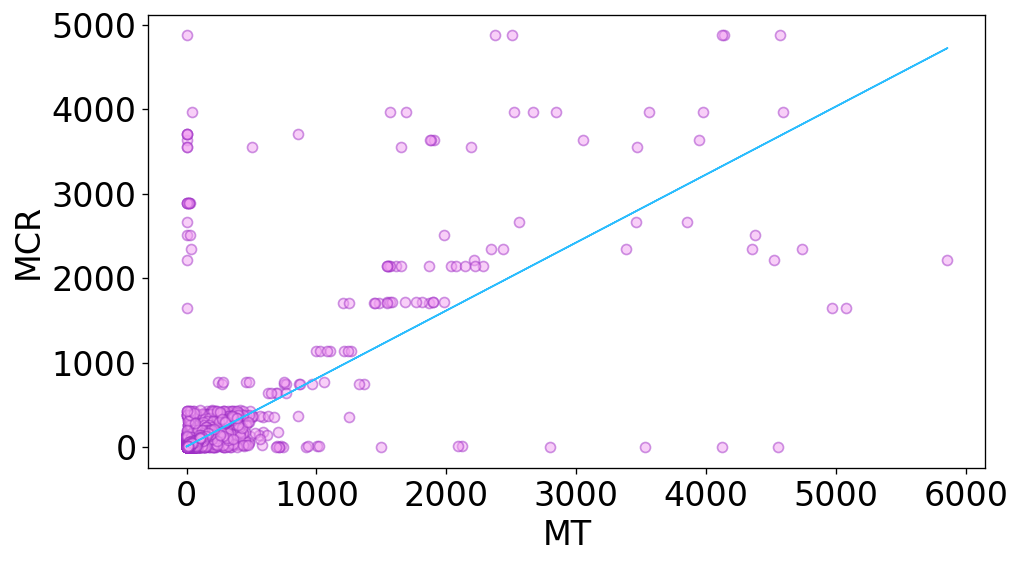

In [104]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

# prediction
Y_predict = reg.predict(X_test)
# plot (before preprocessing)
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.plot(X_test, Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('MT', fontsize=20)
plt.show()

Error ( Before Preprocessing )

In [105]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, Y_predict)
mape = mean_absolute_percentage_error(Y_test, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)

MAPE :  16.39460746955016
MAE :  12.844822381919817


Preprocessing

In [106]:
""" from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, Normalizer

pipe = make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())
pipe.fit(X_train, Y_train)
Y_predict = pipe.predict(X_test) """

' from sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import PolynomialFeatures, Normalizer\n\npipe = make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())\npipe.fit(X_train, Y_train)\nY_predict = pipe.predict(X_test) '

Plot ( After Preprocessing )

In [107]:
""" # plot (after preprocessing)
plt.figure(figsize=(9, 5), dpi=120)
plt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")
plt.plot(X_test, Y_predict, color="#2CBDFE", linewidth=1)
plt.ylabel('MCR', fontsize=15)
plt.xlabel('MT', fontsize=15)
plt.show() """

' # plot (after preprocessing)\nplt.figure(figsize=(9, 5), dpi=120)\nplt.scatter(x=X_test, y=Y_test, color="#F3A0F2", marker="o",alpha=0.5, edgecolors="#9D2EC5")\nplt.plot(X_test, Y_predict, color="#2CBDFE", linewidth=1)\nplt.ylabel(\'MCR\', fontsize=15)\nplt.xlabel(\'MT\', fontsize=15)\nplt.show() '

Error ( After Preprocessing )

In [108]:
# from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# mae = mean_absolute_error(Y_test, Y_predict)
# mape = mean_absolute_percentage_error(Y_test, Y_predict)
# print("MAPE : ", mape)
# print("MAE : ", mae)

Graph

27.460872059163922    27.959242534987467


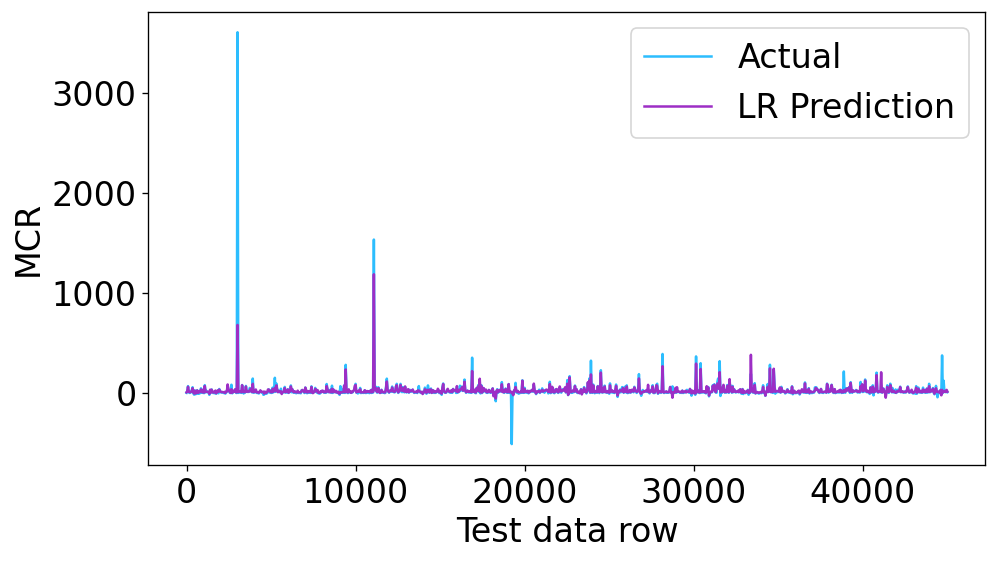

In [109]:
from scipy.interpolate import make_interp_spline

print(np.average(Y_predict), "  ", np.average(Y_test))
plt.figure(figsize=(9, 5), dpi=120)
X_Y_Spline = make_interp_spline(np.arange(44999), Y_test)
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 1000)
Y_ = X_Y_Spline(X_)
 
plt.plot(X_,Y_, label='Actual', color="#2CBDFE")
X_Y_Spline = make_interp_spline(np.arange(44999), Y_predict)
X_ = np.linspace(np.arange(44999).min(), np.arange(44999).max(), 1000)
Y_ = X_Y_Spline(X_)
plt.plot(X_,Y_,  label='LR Prediction', color="#9D2EC5")
plt.subplot().tick_params(labelsize=20)
plt.ylabel('MCR', fontsize=20)
plt.xlabel('Test data row', fontsize=20)
plt.legend(fontsize=20)
plt.show()